### Parseval’s Power Theorem

For a periodic signal $v(t)$ with fundamental period $T_0$, the **average power** in the time domain is

$$
P \;=\; \frac{1}{T_0} \int_{0}^{T_0} |v(t)|^2 \, dt.
$$

Parseval’s Power Theorem states that this power can also be expressed as the sum of the squared magnitudes of its Fourier series coefficients $c_n$:

$$
P \;=\; \sum_{n=-\infty}^{\infty} |c_n|^2.
$$

---

#### Key Ideas
- The Fourier series expansion of a periodic signal is
  $$
  v(t) = \sum_{n=-\infty}^{\infty} c_n \, e^{j 2\pi n f_0 t}, 
  \qquad f_0 = \frac{1}{T_0}.
  $$
- The coefficients $c_n$ capture the **amplitude and phase** of each harmonic.
- Parseval’s theorem shows a **conservation of energy (or power)**:
  - **Time domain:** average power is the mean squared value of $v(t)$.
  - **Frequency domain:** average power is the sum of squared Fourier coefficients.

---

#### Intuition
- Each coefficient $c_n$ contributes an amount $|c_n|^2$ to the total power.  
- Adding up all contributions across harmonics exactly equals the power measured in time.  
- The phase of $c_n$ does **not** affect power — only its magnitude matters.

---

#### Example
- For a square wave, many harmonics have nonzero coefficients.  
  Parseval’s theorem says the total average power equals the sum of all those harmonic powers.  
- For a pure cosine, only one coefficient is nonzero, and all the power is concentrated at a single harmonic.

---

✅ **In short:** Parseval’s theorem is the bridge between **time-domain power** and **frequency-domain power**. It guarantees that no power is lost when moving between domains.


### Parseval’s Theorem (Numerical Verification with a Square Wave)

For a periodic signal $v(t)$ with period $T_0$ and complex Fourier-series coefficients $c_n$, Parseval’s theorem states:

$$
P \;=\; \frac{1}{T_0}\int_{T_0} |v(t)|^2\,dt \;=\; \sum_{n=-\infty}^{\infty} |c_n|^2
$$

On an equally spaced grid of \(N\) samples over one period (excluding the duplicate endpoint), the discrete analogue is:

$$
\frac{1}{N}\sum_{m=0}^{N-1} |v_m|^2 \;=\; \sum_{n=0}^{N-1} |c_n|^2,
$$

with coefficients computed by

$$
c_n \;\approx\; \frac{1}{N}\sum_{m=0}^{N-1} v_m\,e^{-j 2\pi n m/N}.
$$

The code below verifies this identity numerically for a square wave.

P_time = 0.500000000000
P_freq = 0.500000000000
Relative error = 2.220e-16


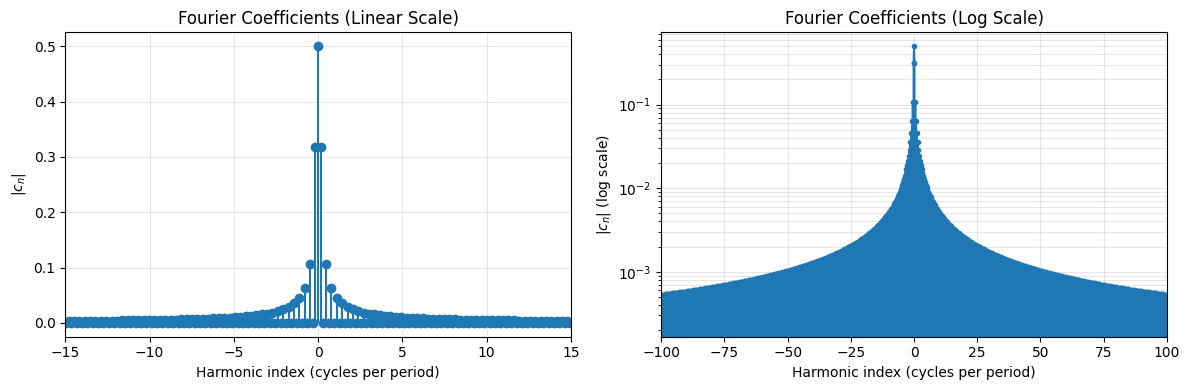

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Parameters
T0 = 2*np.pi                   # period
N  = 4096                      # samples per period (power of 2 just for convenience)
t  = np.linspace(0, T0, N, endpoint=False)

# ---- Test signal: 50% duty square wave in [0, T0)
#      v(t)=1 on [T0/4, 3T0/4), 0 otherwise (shift avoids symmetry pitfalls)
v = np.zeros_like(t)
v[(t >= T0/4) & (t < 3*T0/4)] = 1.0

# ---- Time-domain average power: P_time = (1/T0) ∫ |v|^2 dt ~ mean(|v|^2)
P_time = np.mean(np.abs(v)**2)

# ---- Fourier-series coefficients via DFT with 1/N scaling:
#      c[n] = (1/N) * sum_m v[m] * exp(-j 2π n m / N)
c = np.fft.fft(v) / N

# ---- Frequency-domain power: P_freq = sum_n |c[n]|^2
P_freq = np.sum(np.abs(c)**2)

# ---- Report results
rel_err = abs(P_time - P_freq) / P_time
print(f"P_time = {P_time:.12f}")
print(f"P_freq = {P_freq:.12f}")
print(f"Relative error = {rel_err:.3e}")

# ---- Visualize spectrum |c_n|
freq_idx = np.fft.fftfreq(N, d=T0/N)
order = np.argsort(freq_idx)

plt.figure(figsize=(12,4))

# Linear stem plot
plt.subplot(1,2,1)
plt.stem(freq_idx[order], np.abs(c)[order], basefmt=" ")
plt.xlim(-15, 15)  # zoom near DC
plt.xlabel("Harmonic index (cycles per period)")
plt.ylabel(r"$|c_n|$")
plt.title("Fourier Coefficients (Linear Scale)")
plt.grid(True, alpha=0.3)

# Log-scale plot
plt.subplot(1,2,2)
plt.semilogy(freq_idx[order], np.abs(c)[order], '.-')
plt.xlim(-100, 100)  # wider range to see decay
plt.xlabel("Harmonic index (cycles per period)")
plt.ylabel(r"$|c_n|$ (log scale)")
plt.title("Fourier Coefficients (Log Scale)")
plt.grid(True, which="both", alpha=0.3)

plt.tight_layout()
plt.show()